# 필요 라이브러리 불러오기

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 데이터 불러오기

In [3]:
data = pd.read_csv('data/boston.csv')

In [4]:
# 데이터를 먼저 확인해봅시다.
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 군집화

군집화를 통해서 비슷한 성향을 가진 그룹을 찾아보자.

In [5]:
# 범주형 데이터 제거

del data['chas']

In [6]:
# 나중에 비교를 위한 medv 컬럼도 복사 후 제거를 해둡니다.

medv = data['medv']
del data['medv']

In [7]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
medv

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [13]:
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위하여 PCA를 통해 변수를 2개로 압축해보자.
# 필요 라이브러리를 불러옵니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
# 정규화 진행
# 객체 생성
scaler = StandardScaler()

In [18]:
# 데이터 학습
scaler.fit(data)
# 변환
scaler_data = scaler.transform(data)
scaler_data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [19]:
# 객체 생성
pca = PCA(n_components = 2)

In [20]:
# PCA 학습시키기
pca.fit(scaler_data)

PCA(n_components=2)

In [21]:
# 결과값 확인
pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [22]:
# 데이터 프레임 형태로 변환
data2= pd.DataFrame(data= pca.transform(scaler_data), columns = ['pc1', 'pc2'])

In [23]:
data2.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


# 몇 개로 군집화를 해야할까?

- 위의 데이터를 몇 개의 군집화로 나누는것이 가장 올바른 군집화인지 살펴보자

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘되어있음.

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

In [26]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

In [31]:
x = [] 
y = []

for k in range(1,30) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    
    x.append(k)
    y.append(kmeans.inertia_)

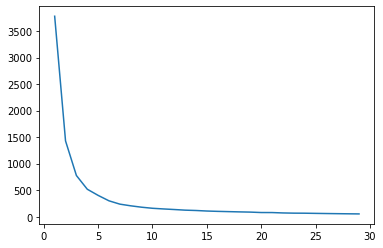

In [35]:
# 그래프 그리기

plt.plot(x, y)

# ELBOW POINT 4 지정 후 클러스터링 시작

In [37]:
kmeans = KMeans(n_clusters = 4)

In [38]:
kmeans.fit(data2)

KMeans(n_clusters=4)

In [39]:
data2['labels'] = kmeans.predict(data2)

In [40]:
data2.head()

,pc1,pc2,labels
0,-2.097234,-0.720179,2
1,-1.456003,-0.947694,2
2,-2.073454,-0.625336,2
3,-2.610161,-0.134044,2
4,-2.456866,-0.229919,2


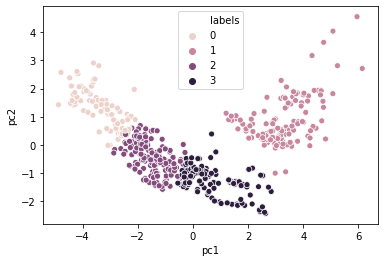

In [41]:
sns.scatterplot(x= 'pc1', y = 'pc2', data= data2, hue='labels')

# 클러스터링 결과 해석하기

pca와 클러스터링을 통해 결과를 해석해봅시다.

가장 먼저 어떠한 그룹이 집 값이 높은지 평균을 비교합니다.

In [42]:
# 맨 처음 떼어 두었던 medv 컬럼을 추가합니다.
data2['medv'] = medv

In [50]:
data2['labels'].value_counts()

2    168
1    134
3    121
0     83
Name: labels, dtype: int64

In [45]:
data2.fit()

AttributeError: 'DataFrame' object has no attribute 'fit'

In [55]:
# 시각화를 위해 각 그룹별 medv값을 따로 변수로 생성합니다.
mdedv_0 = data2[data2['labels']==0]['medv'].mean()
mdedv_1 = data2[data2['labels']==1]['medv'].mean()
mdedv_2 = data2[data2['labels']==2]['medv'].mean()
mdedv_3 = data2[data2['labels']==3]['medv'].mean()

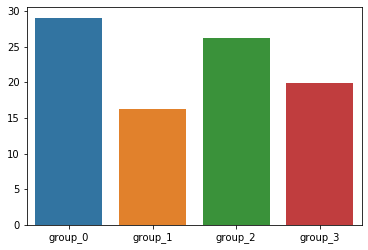

In [56]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 '랜덤'임을 잊지 말 것
sns.barplot(x = ['group_0','group_1','group_2','group_3'], y = [mdedv_0, mdedv_1, mdedv_2, mdedv_3])

# 그룹들의 특징을 살펴보자

최상위 그룹과 최하위 그룹의 특징을 살펴보며 집 값이 높은 이유 혹은 집 값이 낮은 이유에 대해서 살펴보겠습니다.

### 최상위층 - 2번그룹
### 최하위층 - 0번그룹

In [57]:
# 원본 데이터에 라벨을 복제합니다.
data['labels'] = data2['labels']

In [58]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,2
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,2
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2


In [62]:
# 각 그룹의 데이터를 나누어서 변수에 담습니다.
group = data[(data['labels']==1) |(data['labels']==2)]

In [63]:
group

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,2
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,2
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,3.67367,0.0,18.10,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,1
486,5.69175,0.0,18.10,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,1
487,4.83567,0.0,18.10,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,1
489,0.18337,0.0,27.74,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,1


In [64]:
group = group.groupby('labels').mean().reset_index()

In [65]:
group

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,12.571770,0.000000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358
1,2,0.217935,6.604167,6.434107,0.489874,6.485048,56.989881,4.43312,4.625000,281.839286,17.819048,389.853929,9.010417


# 시각화를 위한 subplot

`plt.subplots(행, 열, figsize=())`

여러가지의 그림을 그리는 방법입니다.

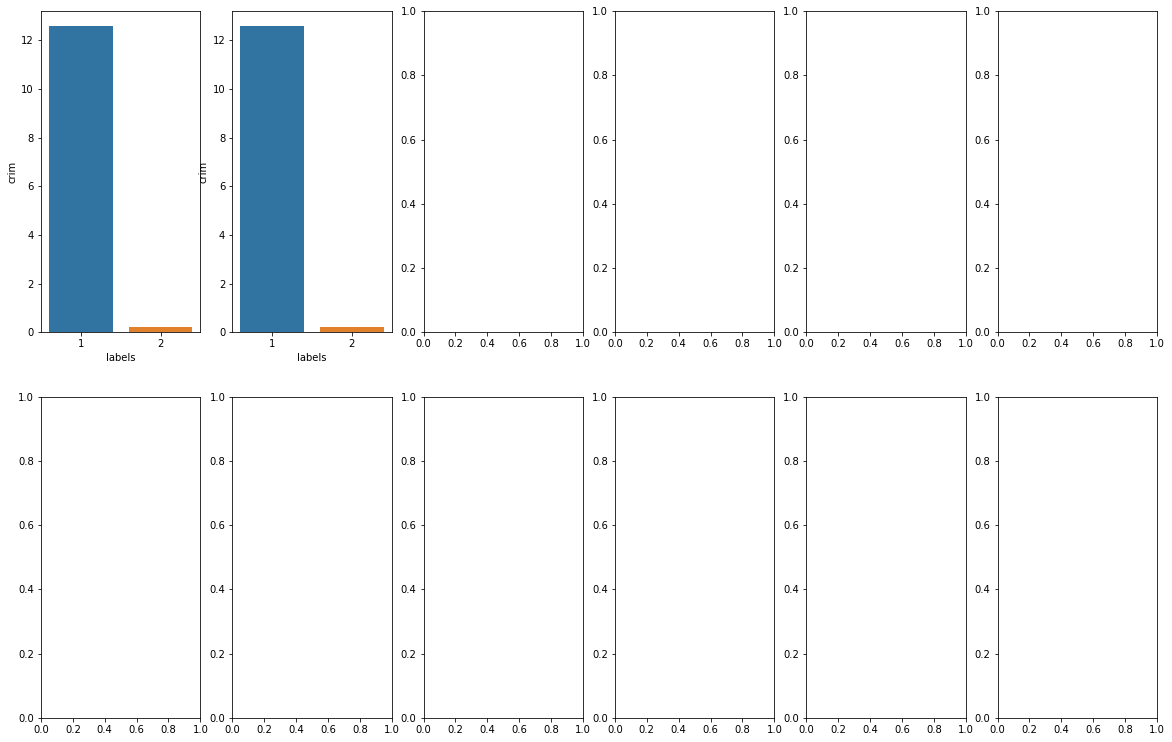

In [69]:
f, ax = plt.subplots(2,6, figsize=(20,13))

sns.barplot(x='labels', y='crim', data=group, ax=ax[0,0])
sns.barplot(x='labels', y='crim', data=group, ax=ax[0,1])

In [73]:
column = group.columns
column

Index(['labels', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat'],
      dtype='object')

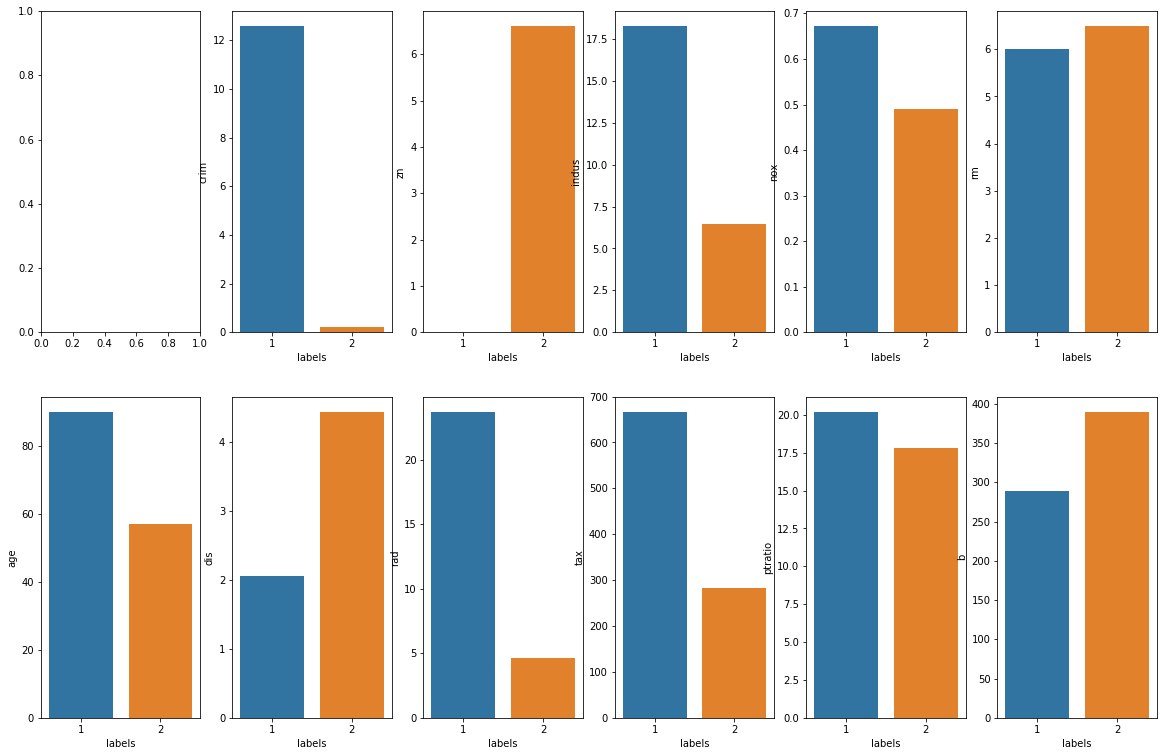

In [75]:
# 반복문을 이용해서 그림을 그려봅시다.

f, ax = plt.subplots(2, 6, figsize=(20,13))

for i in range(1,12) :
    sns.barplot(x= 'labels', y=column[i], data=group, ax=ax[i//6, i%6])



# 결론

그래프에서 보이다 싶이 범죄율이 낮을 수록, 25,000 평방피트를 초과 거주지역 비율이 높을수록 좋은 가격을 나타내는 지역임을 알 수 있습니다다.

또한, 두가지 뿐 아니라 여러가지의 그래프를 보고도 집 값이 높은 지역의 특징들을 살펴볼 수 있습니다.

더 나아가 이번 시간에는 배우지 않지만 레이더차트라는것을 이용해서 그래프를 그린다면 더 깔끔한 시각화로 나타낼 수 있을 것 입니다.